In [1]:
# import the pandas library
import pandas as pd

In [2]:
# loading the dataset
file_path = "/content/Historical Product Demand.csv"
data = pd.read_csv(file_path)


In [3]:
#  show  first few rows
print("Preview of the dataset:")
print(data.head())


Preview of the dataset:
   Product_Code Warehouse Product_Category       Date  Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27           100
1  Product_0979    Whse_J     Category_028  2012/1/19           500
2  Product_0979    Whse_J     Category_028   2012/2/3           500
3  Product_0979    Whse_J     Category_028   2012/2/9           500
4  Product_0979    Whse_J     Category_028   2012/3/2           500


In [4]:
#  check the structure of the dataset
print("\n Basic Information about the dataset:")
print(data.info())


 Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Code      1998 non-null   object
 1   Warehouse         1998 non-null   object
 2   Product_Category  1998 non-null   object
 3   Date              1998 non-null   object
 4   Order_Demand      1998 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 78.2+ KB
None


In [5]:
# check missing values for training a model
print("\n Missing values in each column:")
print(data.isnull().sum())


 Missing values in each column:
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


In [9]:
df = data.copy()

In [11]:

# Convert to string  then remove commas then convert to integers
df['Order_Demand'] = df['Order_Demand'].astype(str).str.replace(',', '', regex=False)
df['Order_Demand'] = df['Order_Demand'].astype(int)

In [12]:
#  Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# grouping data by Date and sum Order_Demand for each day
daily_demand = df.groupby('Date').agg({'Order_Demand': 'sum'}).reset_index()

In [14]:
#  sort by Date (important for time series)
daily_demand = daily_demand.sort_values(by='Date')

In [15]:
# showign the cleaned and grouped data
print(" Cleaned and grouped demand data by date:")
print(daily_demand.head())

 Cleaned and grouped demand data by date:
        Date  Order_Demand
0 2011-12-20          1000
1 2011-12-28             4
2 2011-12-30          1000
3 2012-01-04          4000
4 2012-01-05         25734


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# convert Date to numerical format (var X)
daily_demand['Days_Since_Start'] = (daily_demand['Date'] - daily_demand['Date'].min()).dt.days

In [20]:
#input (X) and output (y) for the model
X = daily_demand[['Days_Since_Start']]
y = daily_demand['Order_Demand']

In [22]:
#create polynomial features (e.g X Xsquare2, Xsquare3)
poly = PolynomialFeatures(degree=3)  # You can change degree to 2 or 4 too
X_poly = poly.fit_transform(X)

In [23]:
# fit the Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [24]:
# pediction using the model
y_pred = model.predict(X_poly)

In [25]:
# measure performance using RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 137655.32


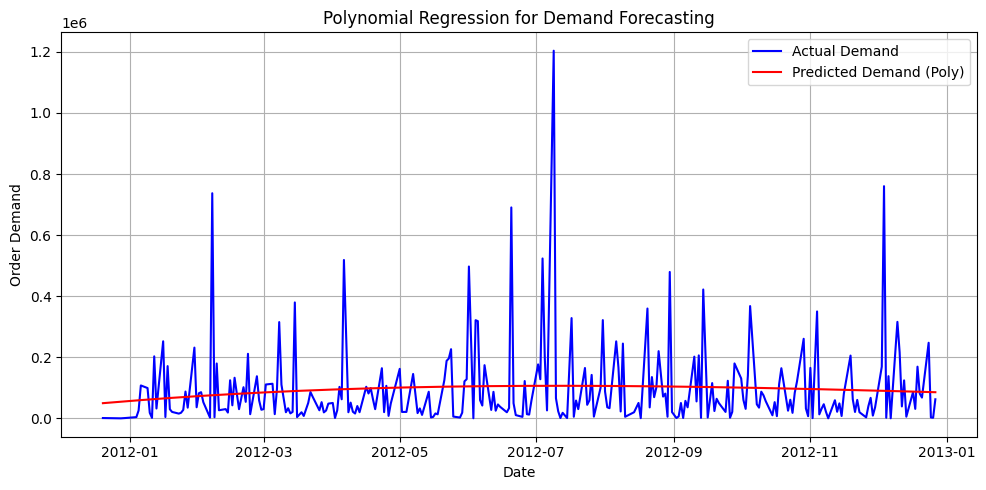

In [26]:
# plot actual vs predicted demand
plt.figure(figsize=(10, 5))
plt.plot(daily_demand['Date'], y, label='Actual Demand', color='blue')
plt.plot(daily_demand['Date'], y_pred, label='Predicted Demand (Poly)', color='red')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Polynomial Regression for Demand Forecasting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# forcasting the future
#hoe many days u want to predict future
future_days = 30
last_day = daily_demand['Days_Since_Start'].max()


In [31]:
# create new future days
future_X = np.arange(last_day + 1, last_day + future_days + 1).reshape(-1, 1)

In [34]:
# create polynomial features for  future data
future_X_poly = poly.transform(future_X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [35]:
# predict future demand
future_y_pred = model.predict(future_X_poly)

In [36]:
# ceate futuree date range
future_dates = pd.date_range(start=daily_demand['Date'].max() + pd.Timedelta(days=1), periods=future_days)

In [37]:
# combine predictions and future dates
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Demand': future_y_pred})

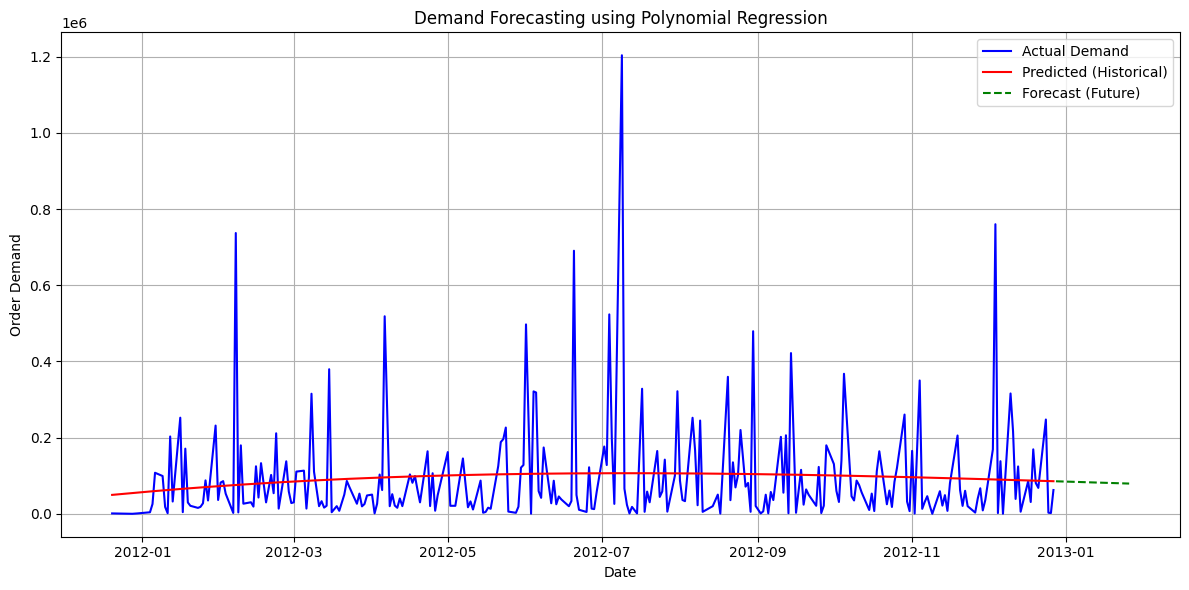

In [38]:
# plot actual + future predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_demand['Date'], y, label='Actual Demand', color='blue')
plt.plot(daily_demand['Date'], y_pred, label='Predicted (Historical)', color='red')
plt.plot(future_df['Date'], future_df['Predicted_Demand'], label='Forecast (Future)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Demand Forecasting using Polynomial Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# saving future demand predictions to a CSV file
future_df.to_csv("Future_Demand_Predictions.csv", index=False)
print(" Future predictions saved as 'Future_Demand_Predictions.csv'.")

 Future predictions saved as 'Future_Demand_Predictions.csv'.


 Plot saved as 'Demand_Forecast_Plot.png'


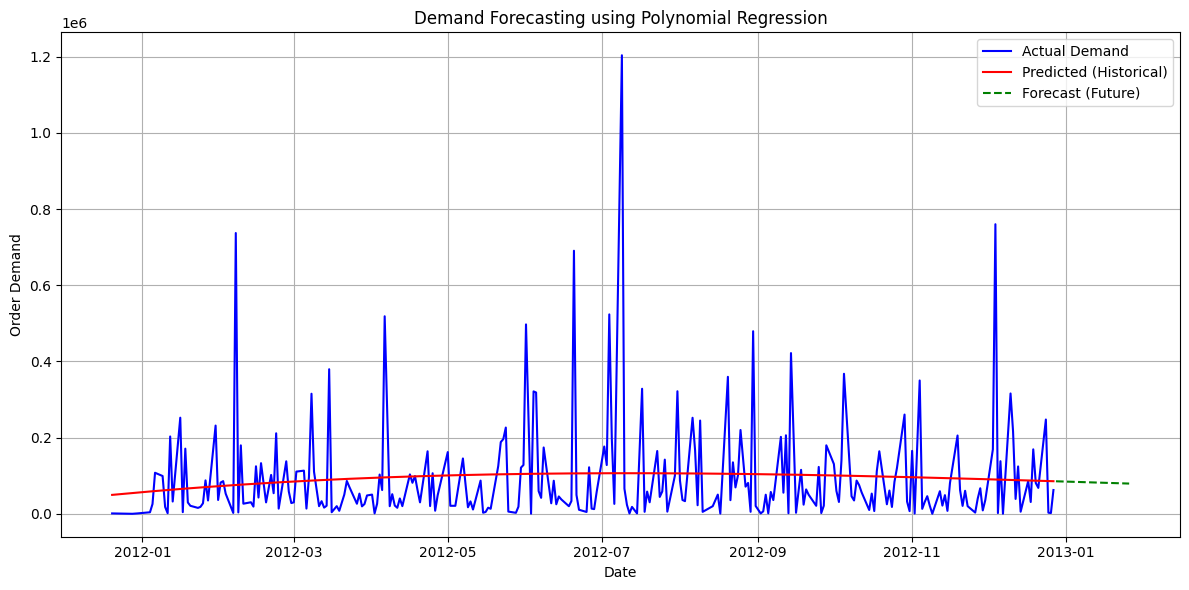

In [41]:
# or we can save the plot as an image
plt.figure(figsize=(12, 6))
plt.plot(daily_demand['Date'], y, label='Actual Demand', color='blue')
plt.plot(daily_demand['Date'], y_pred, label='Predicted (Historical)', color='red')
plt.plot(future_df['Date'], future_df['Predicted_Demand'], label='Forecast (Future)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Demand Forecasting using Polynomial Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Demand_Forecast_Plot.png")
print(" Plot saved as 'Demand_Forecast_Plot.png'")

# Demand Prediction using Polynomial Regression

# Step 1: Load and Inspect the Data  
# Step 2: Data Cleaning and Grouping  
# Step 3: Polynomial Feature Creation  
# Step 4: Model Training & Evaluation  
# Step 5: Forecast Future Demand  
# Step 6: Export Results & Visualization  
